In [1]:

import pandas as pd
import numpy as np
import unicodedata
import re, os
import json


import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import pandas as pd
import time
import random
from requests import get
from bs4 import BeautifulSoup
#the aquire takes a while
import acquire
import GB_prepare

# Aquire

In [2]:
REPOS = acquire.scrape_github_data()

In [3]:
df_Repos = pd.DataFrame(REPOS)

In [4]:
df_Repos.head()

,repo,language,readme_contents
0,zmb3/spotify,Go,\nSpotify\n=======\n\n[![GoDoc](https://godoc....
1,spotDL/spotify-downloader,Python,<!--- mdformat-toc start --slug=github --->\n\...
2,Spotifyd/spotifyd,Rust,# Spotifyd <!-- omit in toc -->\n<!-- ALL-CONT...
3,Rigellute/spotify-tui,Rust,# Spotify TUI\n\n![Continuous Integration](htt...
4,JohnnyCrazy/SpotifyAPI-NET,C#,"\n<h1 align=""center"">\n <p align=""center"">Spo..."


# Prepare

In [5]:
GB_prepare.prepare_df(df_Repos,'readme_contents', extra_words = ['also', '&#9', 'e', 'f', 'ou', 'et', 'n', '1', "'", ';', '3', 'e', 'p'])

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count
0,zmb3/spotify,Go,\nSpotify\n=======\n\n[![GoDoc](https://godoc....,spotify godochttpsgodocorggithubcomzmb3spotify...,spotifi godochttpsgodocorggithubcomzmb3spotify...,spotify godochttpsgodocorggithubcomzmb3spotify...,3918,2352,2640,503,276,276
1,spotDL/spotify-downloader,Python,<!--- mdformat-toc start --slug=github --->\n\...,mdformattoc start sluggithub editing readme en...,mdformattoc start sluggithub edit readm ensur ...,mdformattoc start sluggithub editing readme en...,4300,2834,3021,471,277,277
2,Spotifyd/spotifyd,Rust,# Spotifyd <!-- omit in toc -->\n<!-- ALL-CONT...,spotifyd omit toc allcontributorsbadgestart re...,spotifyd omit toc allcontributorsbadgestart re...,spotifyd omit toc allcontributorsbadgestart re...,2338,1612,1707,235,140,140
3,Rigellute/spotify-tui,Rust,# Spotify TUI\n\n![Continuous Integration](htt...,spotify tui continuous integrationhttpsgithubc...,spotifi tui continu integrationhttpsgithubcomr...,spotify tui continuous integrationhttpsgithubc...,59878,32960,34049,3857,2495,2495
4,JohnnyCrazy/SpotifyAPI-NET,C#,"\n<h1 align=""center"">\n <p align=""center"">Spo...",h1 aligncenter aligncenterspotifyapinetp hrefh...,h1 aligncent aligncenterspotifyapinetp hrefhtt...,h1 aligncenter aligncenterspotifyapinetp hrefh...,2782,1881,2009,272,169,169
...,...,...,...,...,...,...,...,...,...,...,...,...
995,veeraya/8tracks-to-Spotify,JavaScript,"This is a userscript, written in Javascript, t...",userscript written javascript converts 8tracks...,userscript written javascript convert 8track p...,userscript written javascript convert 8tracks ...,797,536,576,113,68,68
996,hannesdatta/spotify-playlist-categories,Python,"# Categorization of Playlists (e.g., mood vers...",categorization playlists eg mood versus genre ...,categor playlist eg mood versu genr playlist g...,categorization playlist eg mood versus genre p...,7366,4541,5049,1115,660,660
997,root-host/Spotify-AdBlock,None,,,,,0,0,0,0,0,0
998,mattiasahlsen/spotify-queue,JavaScript,# spotify-app\n\n## deployed on\nhttps://colla...,spotifyapp deployed httpscollabqueuecom projec...,spotifyapp deploy httpscollabqueuecom project ...,spotifyapp deployed httpscollabqueuecom projec...,355,216,247,48,27,27


In [6]:
df_Repos.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count
0,zmb3/spotify,Go,\nSpotify\n=======\n\n[![GoDoc](https://godoc....,spotify godochttpsgodocorggithubcomzmb3spotify...,spotifi godochttpsgodocorggithubcomzmb3spotify...,spotify godochttpsgodocorggithubcomzmb3spotify...,3918,2352,2640,503,276,276
1,spotDL/spotify-downloader,Python,<!--- mdformat-toc start --slug=github --->\n\...,mdformattoc start sluggithub editing readme en...,mdformattoc start sluggithub edit readm ensur ...,mdformattoc start sluggithub editing readme en...,4300,2834,3021,471,277,277
2,Spotifyd/spotifyd,Rust,# Spotifyd <!-- omit in toc -->\n<!-- ALL-CONT...,spotifyd omit toc allcontributorsbadgestart re...,spotifyd omit toc allcontributorsbadgestart re...,spotifyd omit toc allcontributorsbadgestart re...,2338,1612,1707,235,140,140
3,Rigellute/spotify-tui,Rust,# Spotify TUI\n\n![Continuous Integration](htt...,spotify tui continuous integrationhttpsgithubc...,spotifi tui continu integrationhttpsgithubcomr...,spotify tui continuous integrationhttpsgithubc...,59878,32960,34049,3857,2495,2495
4,JohnnyCrazy/SpotifyAPI-NET,C#,"\n<h1 align=""center"">\n <p align=""center"">Spo...",h1 aligncenter aligncenterspotifyapinetp hrefh...,h1 aligncent aligncenterspotifyapinetp hrefhtt...,h1 aligncenter aligncenterspotifyapinetp hrefh...,2782,1881,2009,272,169,169


# Exploration 

In [7]:
labels = pd.concat([df_Repos.language.value_counts(),
                    df_Repos.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels.head()


,n,percent
JavaScript,246,0.254922
Python,194,0.201036
TypeScript,74,0.076684
Shell,37,0.038342
Java,35,0.036269


In [8]:
#splitting that big af readme contents

In [9]:
Java_words = (' '.join(df_Repos[df_Repos.language == 'JavaScript'].lemmatized)).split()
python_words = (' '.join(df_Repos[df_Repos.language == 'Python'].lemmatized)).split()
type_words= (' '.join(df_Repos[df_Repos.language == 'TypeScript'].lemmatized)).split()
Shell_words= (' '.join(df_Repos[df_Repos.language == 'Shell'].lemmatized)).split()
all_words = (' '.join(df_Repos.lemmatized)).split()


In [10]:
Java_freq = pd.Series(Java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
all_freq = pd.Series(all_words).value_counts()


Java_freq.head(20)

spotify     1209
track        560
app          475
run          467
use          454
playlist     444
npm          433
file         388
user         376
get          345
install      340
api          332
build        300
example      296
code         295
create       283
project      267
using        261
need         254
artist       251
dtype: int64

In [11]:
python_freq.head(20)

spotify     1118
playlist     595
song         485
install      452
track        389
file         385
python       372
use          315
run          309
api          275
using        254
music        208
script       205
get          202
user         201
name         200
client       191
artist       188
web          187
pip          177
dtype: int64

In [12]:
all_freq.head(20)

spotify     5382
track       2375
playlist    2105
use         1660
user        1492
install     1469
file        1457
get         1443
run         1413
song        1320
api         1316
app         1298
artist      1191
using       1150
code         962
example      935
project      933
need         928
client       925
album        918
dtype: int64

In [13]:
type_freq = pd.Series(type_words).value_counts()

In [14]:
word_counts = (pd.concat([Java_freq, python_freq, all_freq, type_freq], axis=1, sort=True)
              .set_axis(['java','python', 'all', 'TypeScript'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [15]:
word_counts.head(20)

,java,python,all,TypeScript
0,58,51,454,31
00,7,0,23,0
000,0,0,7,0
0000,0,1,41,0
000000,0,0,4,0
00005,0,0,1,0
00008000,0,1,1,0
0002,0,0,1,0
00059633501235151045timesignature,0,0,1,0
0006420602303837413mode,0,0,1,0


In [16]:
word_counts.sort_values(by='all', ascending=False).head(50)

,java,python,all,TypeScript
spotify,1209,1118,5382,413
track,560,389,2375,212
playlist,444,595,2105,224
use,454,315,1660,113
user,376,201,1492,186
install,340,452,1469,100
file,388,385,1457,85
get,345,202,1443,218
run,467,309,1413,130
song,174,485,1320,98


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

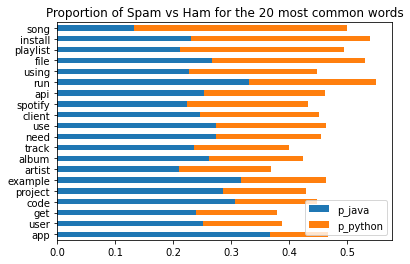

In [20]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_java=word_counts.java / word_counts['all'],
         p_python=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['p_java', 'p_python']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


In [22]:
(word_counts
 [(word_counts.java > 10) & (word_counts.python > 10)]
 .assign(ratio=lambda df: df.java / (df.python + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))


,java,python,all,TypeScript,ratio
python,19,372,470,5,0.051074
password,13,78,152,4,0.166645
50,22,109,250,78,0.201816
reference,16,79,158,4,0.202506
program,13,58,138,0,0.224099
deploy,69,13,121,21,5.303613
state,65,12,208,16,5.412157
scope,72,13,235,47,5.534204
integration,74,13,136,7,5.687932
component,103,11,215,54,9.355132


In [23]:
from wordcloud import WordCloud


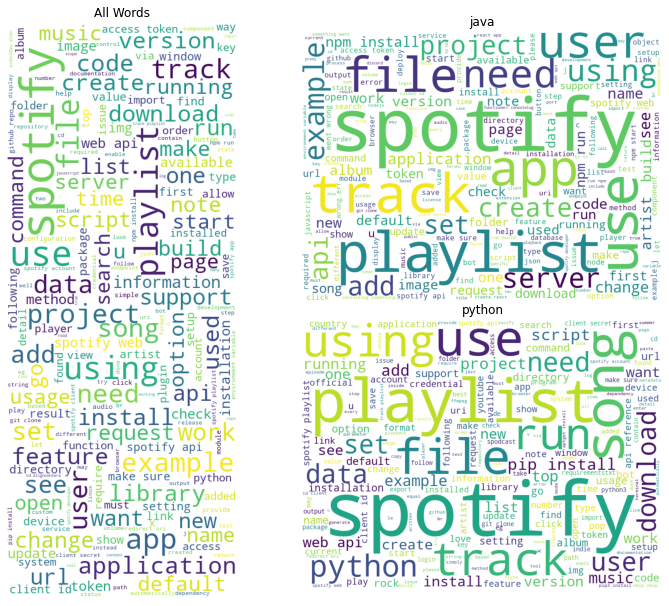

In [25]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Java_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('java')
axs[2].set_title('python')

for ax in axs: ax.axis('off')


In [ ]:
### 

In [28]:
top_20_java_bigrams = (pd.Series(nltk.ngrams(Java_words, 2))
                      .value_counts()
                      .head(20))

top_20_java_bigrams.head()


(npm, install)     133
(npm, run)         116
(spotify, web)     100
(access, token)     89
(spotify, api)      89
dtype: int64

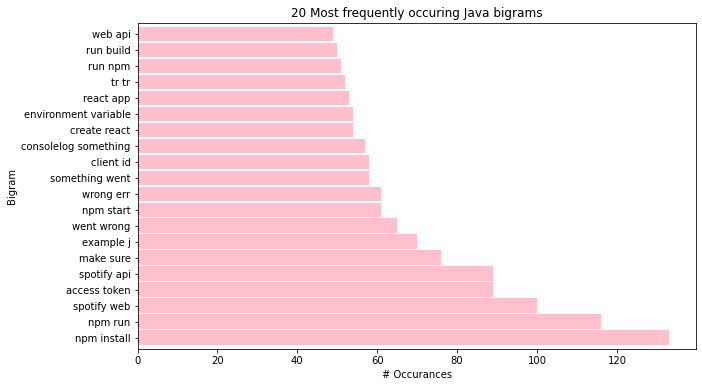

In [29]:
top_20_java_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Java bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


### python

In [30]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()


(pip, install)         140
(web, api)             109
(api, reference)        76
(spotify, playlist)     71
(top, 50)               71
dtype: int64

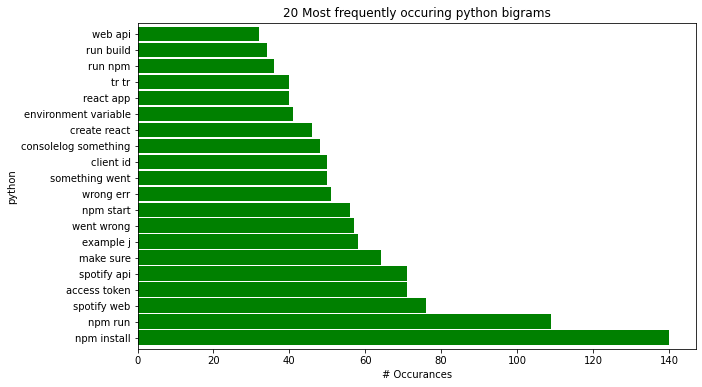

In [32]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring python bigrams')
plt.ylabel('python')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)